# Felipe Castillo
# Bag of Words Meets Bags of Popcorn Assignment
# Data Mining
# 04/06/2022

In [378]:
import pandas as pd
import os
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import random
from sklearn.metrics import r2_score
from math import sqrt

from sklearn.metrics import mean_squared_error
#Change path to week one folder for DSC-550
#Current directory in documents
os.chdir('C:\DataScience_DSC_550\Week4')


# 1.Load the data as a Pandas data frame and ensure that it imported correctly.

In [52]:
auto_mpg_df = pd.read_csv("auto-mpg.csv")

In [114]:
auto_mpg_df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


# 2.Begin by prepping the data for modeling

Notes:

 1.Remove the car name column.
 
 2.The horsepower column values likely imported as a   string data type. Figure out why and replace any strings with the column mean.
 
 3.Create dummy variables for the origin column.

In [57]:
#Remove car name column
auto_df = auto_mpg_df.copy()
auto_df = auto_df.drop('car name', axis=1)

In [58]:
auto_df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1


In [59]:
#Horse power is of type of object
#Means that there is a possiblity of more then numerical values
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [25]:
#Confirmed column data type
auto_df.horsepower.dtype

dtype('O')

In [111]:
#The data set contains '?' that could disrupt the conversion between object and float
#Needs to be removed and replaced with the hourse power mean
#Replacing column values with type float, if ? mean replaces it.
#All values converted to type float
auto_df['horsepower'] = auto_df['horsepower'].astype("float").replace('?' , auto_df['horsepower'].astype("float").mean(), regex = True)




In [108]:
#Type Float
auto_df.horsepower.dtype

dtype('float64')

Figure out why and replace any strings with the column mean.


The reason why this column is of type object is due to it being able to come in as different values and data type. In this column the ‘?’ mark is none numeric therefore it can’t come in as an integer. It needs to be handled if this column is to be processed. Without this process it will throw an exception There are a lot of reason in the real world this could happened. Perhaps the individual accidently types a non-numeric value, or perhaps this is the way the company want to handle this type of nonnumeric value. Either way the column is of type object due to there being a string a non-numeric value.






In [138]:
#Create dummy variables for the origin column.
auto_df['origin'] = auto_df['origin'].astype(str).replace(r'[0-9]' , '@', regex = True)

In [141]:
auto_df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,@
1,15.0,8,350.0,165.0,3693,11.5,70,@


# 3.Create a correlation coefficient matrix and/or visualization.

In [143]:
corrMatrix = auto_df.corr()
print(corrMatrix)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.771543 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.839061  0.896017   
displacement -0.804203   0.950721      1.000000    0.893760  0.932824   
horsepower   -0.771543   0.839061      0.893760    1.000000  0.860676   
weight       -0.831741   0.896017      0.932824    0.860676  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.684376 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.411750 -0.306564   

              acceleration  model year  
mpg               0.420289    0.579267  
cylinders        -0.505419   -0.348746  
displacement     -0.543684   -0.370164  
horsepower       -0.684376   -0.411750  
weight           -0.417457   -0.306564  
acceleration      1.000000    0.288137  
model year        0.288137    1.000000  


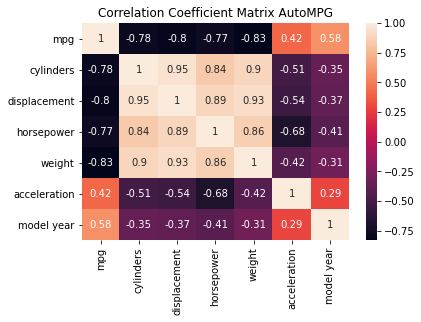

In [481]:
sn.heatmap(corrMatrix, annot= True)
plt.title("Correlation Coefficient Matrix AutoMPG")
plt.show()

Are there features highly correlated with mpg?

There are two features that are correlated with mpg. The first feature is acceleration with a .42 and model year with a .58.  And mpg obviously correlates with itself.  However, if we are assuming that .95 and above is “highly correlated”, then there are no features that meet those standards. Overall, all other features were negativity correlated.
https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python



# 4.Plot mpg versus weight.

Text(0, 0.5, 'mpg')

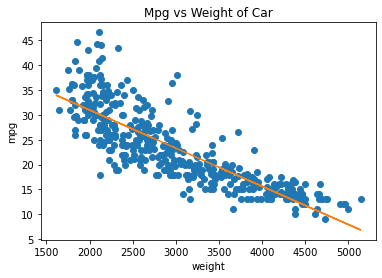

In [425]:
#plotting scatter
plt.plot(auto_df['weight'], auto_df['mpg'],  'o')

#Getting slope m and intercept b of linear regression 
m, b = np.polyfit( auto_df['weight'],auto_df['mpg'], 1)

#ploting line
#Using a regression line
plt.plot(auto_df['weight'], m*auto_df['weight']+b)

#Plot title
plt.title("Mpg vs Weight of Car")
#Plot x axis
plt.xlabel("weight")
#plot y axis
plt.ylabel("mpg")

Analyze this graph and explain how it relates to the corresponding correlation coefficient.

Overall, the regression line is showing the mpg vs weight have negative correlation with one another. This reflects with correlation matrix which indicated that mpg correlation with weight was at a -.83. The graphs output and the correlation matrix go hand in hand with one another. The correlation coefficient seems to directly related to the graph. Both show a  negative correlation.


# 5.Randomly split the data into 80% training data and 20% test data, where your target is mpg.

# 6.Train an ordinary linear regression on the training data.

In [441]:
#Making a function to return r2 
def RsquaredConversion(target_test, target_predicated):
    #Invokes r2 score function 
    r_squared = r2_score(target_test,target_predicated)
    #Returns value
    return r_squared

In [442]:
auto_df.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,@


In [443]:
#Has all
#Has all values upset origin and mpg. Mpg will be used as target, origin is in character from and doesn’t provided ay use for our model.
features = auto_df[['weight','cylinders','displacement','horsepower','weight','acceleration','model year']]

#dividing to mpg column
target  = auto_df['mpg']

In [444]:
#Training the data 
#passed in all columns as features and passed mpg as target
#set the test_size to .20
features_train, features_test, target_train, target_test = train_test_split(features, target,  shuffle=True, test_size = 0.20)

In [445]:
#Instantiating linear regression class
regression = LinearRegression()

In [446]:
#Making model and passing both train feilds
model = regression.fit(features_train, target_train)

# 7.Calculate R2, RMSE, and MAE on both the training and test sets 

# Testing set

In [448]:
#Making target predict , which is reference in page 201
#Will pass it into r2 conversion
target_predicted = model.predict(features_test)

In [449]:
#Get R2 score
r2 = RsquaredConversion(target_test,target_predicted)
print(r2)

0.7935445009391737


In [450]:
#Getting mse
mse = mean_squared_error(target_test, target_predicted)
print(mse)

11.253161498171448


In [451]:
#Getting rmse
rmse = np.sqrt(mse)
print(rmse)

3.3545732214652055


# Training sets

In [452]:
# instead of test no using train
tr_target_predicted = model.predict(features_train)

In [453]:
#Got R2 score
r2 = RsquaredConversion(target_train,tr_target_predicted)
print(r2)

0.8104387286443262


In [455]:
#Getting rmse
mse = mean_squared_error(target_train, tr_target_predicted)
print(mse)

11.82502600987953


In [409]:
#Getting rmse
rmse = np.sqrt(mse)
print(rmse)

3.3820799068131673


# interpret your results.
Overall, the R2 scores were 79 percent of testing and 81 percent training. This indicates that the relationship between these variables explain 80-81 percent of the variation in the data.  The MSE and RMSE are a high. This give me the indication that there are various outliers that are skewing the score. Its far off from 0 meaning the quality is not as good.  This means that the data is overfitted. And  most likely has little predict value. If the data was more similar we might see better score in this section.

# 8.Pick another regression model and repeat the previous two steps. 

Note: Do NOT choose logistic regression as it is more like a classification model.

In [469]:
# unaware if this standard scaler is need. However it is recommned by many data science articles.

In [471]:
#Setting the standard scaler
scaler = StandardScaler()

In [472]:
#scaling the features data set
features_scaled = scaler.fit_transform(features)

In [473]:
#Retraining data feilds with featured_scaled instead of features. So that new scaled data set can be used for features.
features_train, features_test, target_train, target_test = train_test_split(features_scaled, target,  shuffle=True, test_size = 0.20)

In [474]:
#Ridge regression
ridge =  Ridge()

In [475]:
#predicted_y = model.predict(x_test)
model = ridge.fit(features_train, target_train)

In [476]:
ridge_target_predict = model.predict(features_test)

# Testing set

In [477]:
#Got R2 score
#r2 = RsquaredConversion(features_train,ridge_target_predict)
#print(r2)
r2_score(target_test,ridge_target_predict)

0.8047645764355607

In [478]:
#getting mse
mse = mean_squared_error(target_test, ridge_target_predict)
print(mse)

10.664502865086664


In [479]:
#getting rmse
rmse = np.sqrt(mse)
print(rmse)

3.2656550437985126


# Training sets

In [465]:
#getting predicted values for train
tr_ridge_target_predict = model.predict(features_train)

In [466]:
#getting R2 score
r2 = RsquaredConversion(target_train,tr_ridge_target_predict)
print(r2)

0.7970560549803101


In [467]:
#getting mse
mse = mean_squared_error(target_train, tr_ridge_target_predict)
print(mse)

12.262364302344885


In [468]:
#getting rmse
rmse = np.sqrt(mse)
print(rmse)

3.501765883428657


# interpret your results.
Overall, the R2 scores were 80 percent of testing and 79 percent training. This indicates that the relationship between these variables explain 79-80 percent of the variation in the data.  The MSE and RMSE are also high. This give me the indication that there are various outliers that are skewing the score. Its far off from 0 meaning the quality is not as good.  This means that the data is overfitted. And  most likely has little predict value. If the data was more similar we might see better score in this section.I assumed that ridge regression would give a lower mse and rmse.